In [1]:
import pandas as pd
import numpy as np
import ast
import os

# 多步法按batch合并数据

In [2]:
model_list = ['vit_b_16', 'resnet50', 'vgg16']
data_root = './data_stage2/vis_multi_step_0922_64'
save_result_file = 'vis_result_multi_step_0920.xlsx'

In [3]:
data1 = pd.read_excel(os.path.join(data_root, f'{model_list[0]}', f'{model_list[0]}_{save_result_file}'))
data2 = pd.read_excel(os.path.join(data_root, f'{model_list[0]}', f'{model_list[0]}_{save_result_file}'))
data3 = pd.read_excel(os.path.join(data_root, f'{model_list[0]}', f'{model_list[0]}_{save_result_file}'))
print(data1.shape)
print(data2.shape)
print(data3.shape)

(2400, 14)
(2400, 14)
(2400, 14)


In [4]:
data1.head()

,model,algo,alpha,mask_mode,step,parameter,eta,success_rate,l1_norm,l2_norm,loss,run_time,batch_idx,batch_pictures
0,vit_b_16,i_fgsm,0.0001,positive,0,NaN,0.01,0.0,25.6564,0.003375,-0.090,154.891,1,64
1,vit_b_16,i_fgsm,0.0001,positive,1,NaN,0.01,0.0,25.2672,0.002246,-0.093,154.891,1,64
2,vit_b_16,i_fgsm,0.0001,positive,2,NaN,0.01,0.0,26.1118,0.002312,-0.095,154.891,1,64
3,vit_b_16,i_fgsm,0.0001,positive,3,NaN,0.01,0.0,26.6240,0.002320,-0.098,154.891,1,64
4,vit_b_16,i_fgsm,0.0001,positive,4,NaN,0.01,0.0,27.3993,0.002446,-0.100,154.891,1,64


In [5]:
def l1_norm(series):
    return series.abs().sum()

def l2_norm(series):
    return np.sqrt((series ** 2).sum())

def merge_batch_onestep(data): 
    '''将多个batch的数据合并''' 
    data['parameter'] = data['parameter'].fillna(-1)
    li = ['model', 'algo', 'alpha', 'mask_mode', 'step', 'parameter', 'eta']
    data_grouped = data.groupby(li).agg({
        'l1_norm': l1_norm,
        'l2_norm': l2_norm,
        'loss': 'mean',
        'success_rate': lambda x: round(x.mean(), 4),
        'run_time': 'sum',
        'batch_pictures': 'sum'
    }).reset_index()
    return data_grouped

In [6]:
data1_grouped = merge_batch_onestep(data1)
data2_grouped = merge_batch_onestep(data2)
data3_grouped = merge_batch_onestep(data3)

In [7]:
data3_grouped.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.0,152.483,64
1,vit_b_16,i_fgsm,0.0001,all,1,-1.0,0.01,52.2063,0.004652,-0.095,0.0,152.483,64
2,vit_b_16,i_fgsm,0.0001,all,2,-1.0,0.01,55.1260,0.004906,-0.101,0.0,152.483,64
3,vit_b_16,i_fgsm,0.0001,all,3,-1.0,0.01,58.5501,0.005559,-0.106,0.0,152.483,64
4,vit_b_16,i_fgsm,0.0001,all,4,-1.0,0.01,62.1306,0.006131,-0.112,0.0,152.483,64


In [8]:
print(data1_grouped.shape)
print(data2_grouped.shape)
print(data3_grouped.shape)

(2400, 13)
(2400, 13)
(2400, 13)


In [9]:
data_grouped = pd.concat([data1_grouped, data2_grouped, data3_grouped], axis=0)
print(data_grouped.shape)
data_grouped.head()

(7200, 13)


,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.0,152.483,64
1,vit_b_16,i_fgsm,0.0001,all,1,-1.0,0.01,52.2063,0.004652,-0.095,0.0,152.483,64
2,vit_b_16,i_fgsm,0.0001,all,2,-1.0,0.01,55.1260,0.004906,-0.101,0.0,152.483,64
3,vit_b_16,i_fgsm,0.0001,all,3,-1.0,0.01,58.5501,0.005559,-0.106,0.0,152.483,64
4,vit_b_16,i_fgsm,0.0001,all,4,-1.0,0.01,62.1306,0.006131,-0.112,0.0,152.483,64


In [10]:
def calculate_eta_reverse(row):
    if row['mask_mode'] in ('cam_lowr', 'lowr'):
        return 1 - row['parameter']
    else:
        return row['parameter']
data_grouped.loc[:, '1_parameter'] = data_grouped.apply(calculate_eta_reverse, axis=1)
print(data_grouped.shape)
data_grouped.head()

(7200, 14)


,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.0,152.483,64,-1.0
1,vit_b_16,i_fgsm,0.0001,all,1,-1.0,0.01,52.2063,0.004652,-0.095,0.0,152.483,64,-1.0
2,vit_b_16,i_fgsm,0.0001,all,2,-1.0,0.01,55.1260,0.004906,-0.101,0.0,152.483,64,-1.0
3,vit_b_16,i_fgsm,0.0001,all,3,-1.0,0.01,58.5501,0.005559,-0.106,0.0,152.483,64,-1.0
4,vit_b_16,i_fgsm,0.0001,all,4,-1.0,0.01,62.1306,0.006131,-0.112,0.0,152.483,64,-1.0


In [11]:
data_grouped.to_excel(os.path.join(data_root, save_result_file), index=False)

In [12]:
# 按 li 列进行分组，并只保留 step 为 0 和 step 最大的数据
li = ['model', 'algo', 'alpha', 'mask_mode', 'parameter', 'eta']
def filter_steps(group):
    return group[(group['step'] == 0) | (group['step'] == group['step'].max())]

df_filtered = data_grouped.groupby(li).apply(filter_steps).reset_index(drop=True)
print(df_filtered.shape)
df_filtered.head()

(48, 14)


/tmp/ipykernel_3263149/2499813439.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtered = data_grouped.groupby(li).apply(filter_steps).reset_index(drop=True)


,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.00,152.483,64,-1.0
1,vit_b_16,i_fgsm,0.0001,all,299,-1.0,0.01,779.1058,1.503996,-4.254,0.75,152.483,64,-1.0
2,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.00,152.483,64,-1.0
3,vit_b_16,i_fgsm,0.0001,all,299,-1.0,0.01,779.1058,1.503996,-4.254,0.75,152.483,64,-1.0
4,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.00,152.483,64,-1.0


In [13]:
df_filtered.to_excel(os.path.join(data_root, f'filtered_{save_result_file}'), index=False)

# 结果分析

In [15]:
data_grouped = pd.read_excel('./data_stage2/multi_step_total100_0918/result_multi_step_total100_0918.xlsx')
data_grouped.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,144.8242,0.031619,-0.118667,0.0,161.234519,100
1,vit_b_16,i_fgsm,0.0001,all,1,-1.0,0.01,150.3013,0.026202,-0.125851,0.0,161.234519,100
2,vit_b_16,i_fgsm,0.0001,all,2,-1.0,0.01,162.3484,0.043079,-0.133787,0.0,161.234519,100
3,vit_b_16,i_fgsm,0.0001,all,3,-1.0,0.01,167.7202,0.028644,-0.141739,0.0,161.234519,100
4,vit_b_16,i_fgsm,0.0001,all,4,-1.0,0.01,176.6721,0.031435,-0.150002,0.0,161.234519,100


In [20]:
# 50是因为早停，两个batch的step不一样， step更多的batch就只有一个batch
data_temp = data_grouped[data_grouped['batch_pictures'] == 50]

In [24]:
data_temp.head(10)

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures
186,vit_b_16,i_fgsm,0.0001,all,186,-1.0,0.01,811.5166,3.370549,-4.126517,0.76,87.362077,50
187,vit_b_16,i_fgsm,0.0001,all,187,-1.0,0.01,1000.0313,10.487166,-4.146574,0.76,87.362077,50
188,vit_b_16,i_fgsm,0.0001,all,188,-1.0,0.01,817.9879,3.495524,-4.143640,0.76,87.362077,50
189,vit_b_16,i_fgsm,0.0001,all,189,-1.0,0.01,974.0146,9.431101,-4.162920,0.76,87.362077,50
190,vit_b_16,i_fgsm,0.0001,all,190,-1.0,0.01,887.5105,4.405520,-4.159655,0.76,87.362077,50
191,vit_b_16,i_fgsm,0.0001,all,191,-1.0,0.01,952.2021,8.725232,-4.179106,0.76,87.362077,50
192,vit_b_16,i_fgsm,0.0001,all,192,-1.0,0.01,830.5271,3.867588,-4.176286,0.76,87.362077,50
193,vit_b_16,i_fgsm,0.0001,all,193,-1.0,0.01,963.6346,8.039209,-4.193343,0.76,87.362077,50
194,vit_b_16,i_fgsm,0.0001,all,194,-1.0,0.01,830.6661,3.999906,-4.191947,0.76,87.362077,50
195,vit_b_16,i_fgsm,0.0001,all,195,-1.0,0.01,925.0830,6.676426,-4.209399,0.76,87.362077,50


In [31]:
for column in df_filtered.columns:
    if column not in ('l1_norm', 'l2_norm', 'success_rate', 'run_time', 'step', 'loss'):
        unique_values = df_filtered[column].unique()
        print(f"字段 '{column}' 的唯一值: {unique_values}")
print(df_filtered.columns)

字段 'model' 的唯一值: ['resnet50' 'vgg16' 'vit_b_16']
字段 'algo' 的唯一值: ['i_fgsm']
字段 'alpha' 的唯一值: [0.0001]
字段 'mask_mode' 的唯一值: ['all' 'cam_lowr' 'cam_topr' 'lowr' 'negative' 'positive' 'randomr' 'topr']
字段 'parameter' 的唯一值: [-1.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
字段 'eta' 的唯一值: [0.01]
字段 'batch_pictures' 的唯一值: [100  50]
字段 '1_parameter' 的唯一值: [-1.   0.9  0.8  0.7  0.6  0.5  0.4  0.3  0.2  0.1  0.1  0.2  0.3  0.7]
Index(['model', 'algo', 'alpha', 'mask_mode', 'step', 'parameter', 'eta',
       'l1_norm', 'l2_norm', 'loss', 'success_rate', 'run_time',
       'batch_pictures', '1_parameter'],
      dtype='object')


# 画图分析

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import os
import math
from sklearn.linear_model import LinearRegression

font_path = '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'  # 显示中文字体

if not os.path.exists(font_path):
    print(f"字体文件 {font_path} 未找到。请确保字体文件存在于工作目录中。")
else:
    # 创建FontProperties对象
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()

In [45]:
from tools.show_result_multi_step import *

## 先只看结果（只关注step0和最后一步攻击的结果）

In [22]:
data_root = './data_stage2/multi_step_total100_0918'

In [3]:
data_result = pd.read_excel('./data_stage2/multi_step_total100_0918/filtered_result_multi_step_total100_0918.xlsx')
data_result.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter
0,resnet50,i_fgsm,0.0001,all,0,-1.0,0.01,238.2271,0.033830,-0.117944,0.00,28.247554,100,-1.0
1,resnet50,i_fgsm,0.0001,all,153,-1.0,0.01,1360.4270,0.748403,-10.919838,1.00,12.953759,50,-1.0
2,resnet50,i_fgsm,0.0001,cam_lowr,0,0.1,0.01,13.7307,0.000937,-0.117944,0.00,141.894251,100,0.9
3,resnet50,i_fgsm,0.0001,cam_lowr,82,0.1,0.01,9.1071,0.001118,-0.179300,0.06,98.997093,50,0.9
4,resnet50,i_fgsm,0.0001,cam_lowr,0,0.2,0.01,28.1761,0.001881,-0.117944,0.00,220.220289,100,0.8


In [42]:
data_result2 = pd.read_excel('./data_stage2/vis_multi_step_0922_64/filtered_vis_result_multi_step_0920.xlsx')

In [4]:
# 新增列end，如果step = 0，end = 0；否则end = 1
data_result['end'] = data_result['step'].apply(lambda x: 0 if x == 0 else 1)
data_result.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter,end
0,resnet50,i_fgsm,0.0001,all,0,-1.0,0.01,238.2271,0.033830,-0.117944,0.00,28.247554,100,-1.0,0
1,resnet50,i_fgsm,0.0001,all,153,-1.0,0.01,1360.4270,0.748403,-10.919838,1.00,12.953759,50,-1.0,1
2,resnet50,i_fgsm,0.0001,cam_lowr,0,0.1,0.01,13.7307,0.000937,-0.117944,0.00,141.894251,100,0.9,0
3,resnet50,i_fgsm,0.0001,cam_lowr,82,0.1,0.01,9.1071,0.001118,-0.179300,0.06,98.997093,50,0.9,1
4,resnet50,i_fgsm,0.0001,cam_lowr,0,0.2,0.01,28.1761,0.001881,-0.117944,0.00,220.220289,100,0.8,0


In [43]:
data_result2['end'] = data_result2['step'].apply(lambda x: 0 if x == 0 else 1)
data_result2.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter,end
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.00,152.483,64,-1.0,0
1,vit_b_16,i_fgsm,0.0001,all,299,-1.0,0.01,779.1058,1.503996,-4.254,0.75,152.483,64,-1.0,1
2,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.00,152.483,64,-1.0,0
3,vit_b_16,i_fgsm,0.0001,all,299,-1.0,0.01,779.1058,1.503996,-4.254,0.75,152.483,64,-1.0,1
4,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,51.4714,0.006974,-0.090,0.00,152.483,64,-1.0,0


findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not 

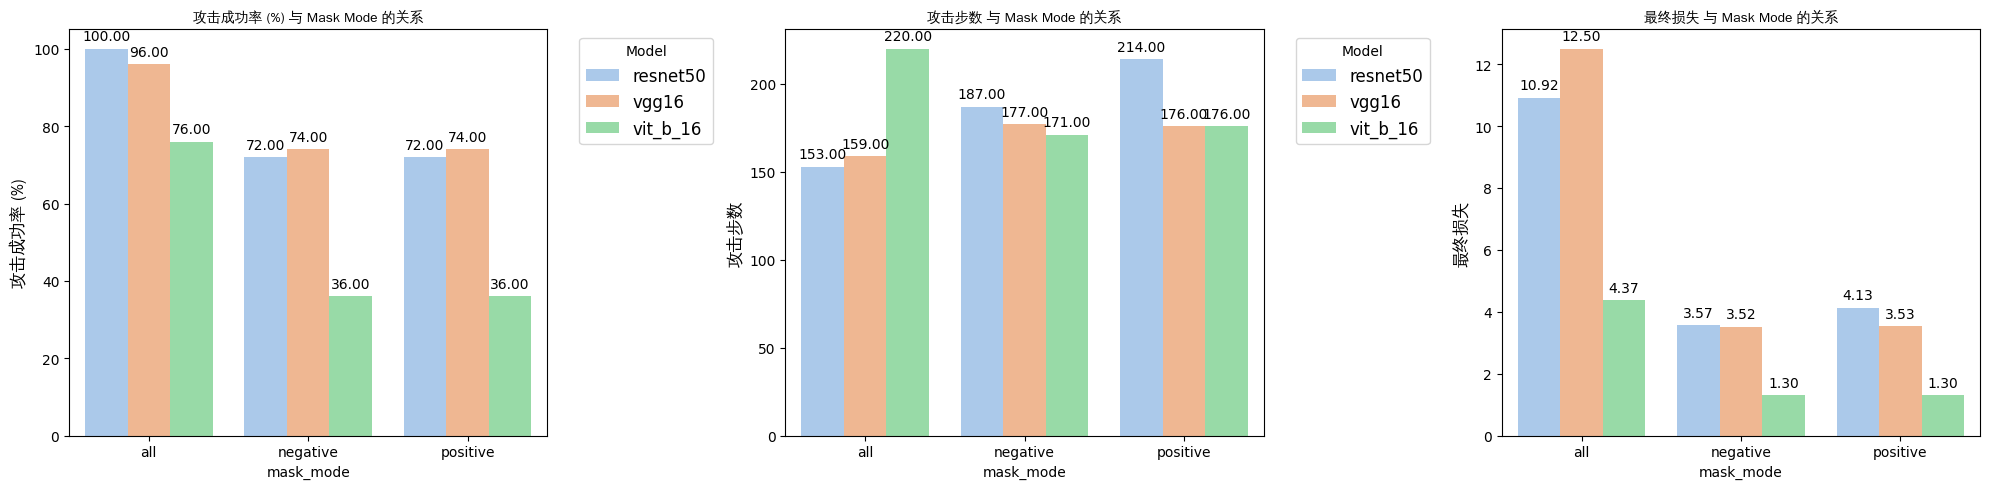

In [41]:
plot_success_rate_vs_mask_mode(data_result, output_path=data_root, save_name='success_rate_vs_mask_mode')

findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not found.
findfont: Font family 'WenQuanYi Zen Hei' not 

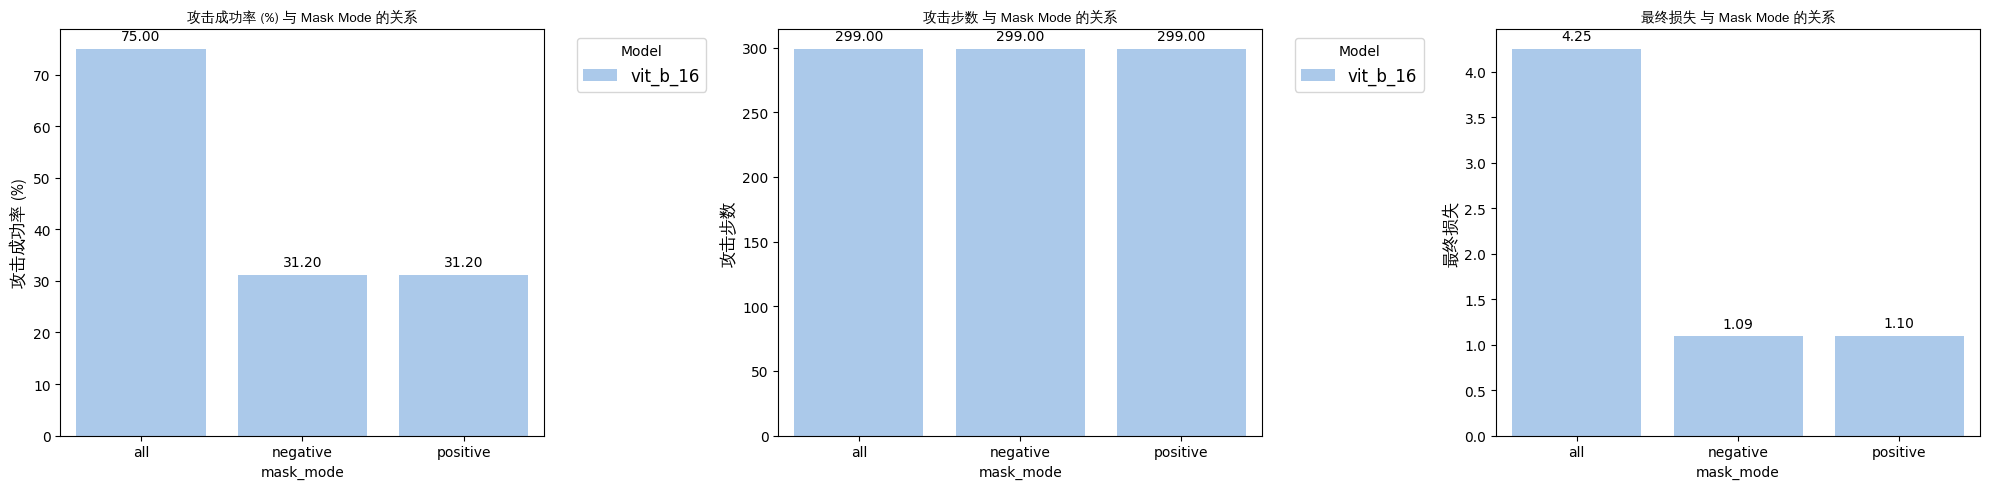

In [44]:
plot_success_rate_vs_mask_mode(data_result2, output_path=data_root, save_name='success_rate_vs_mask_mode_64')

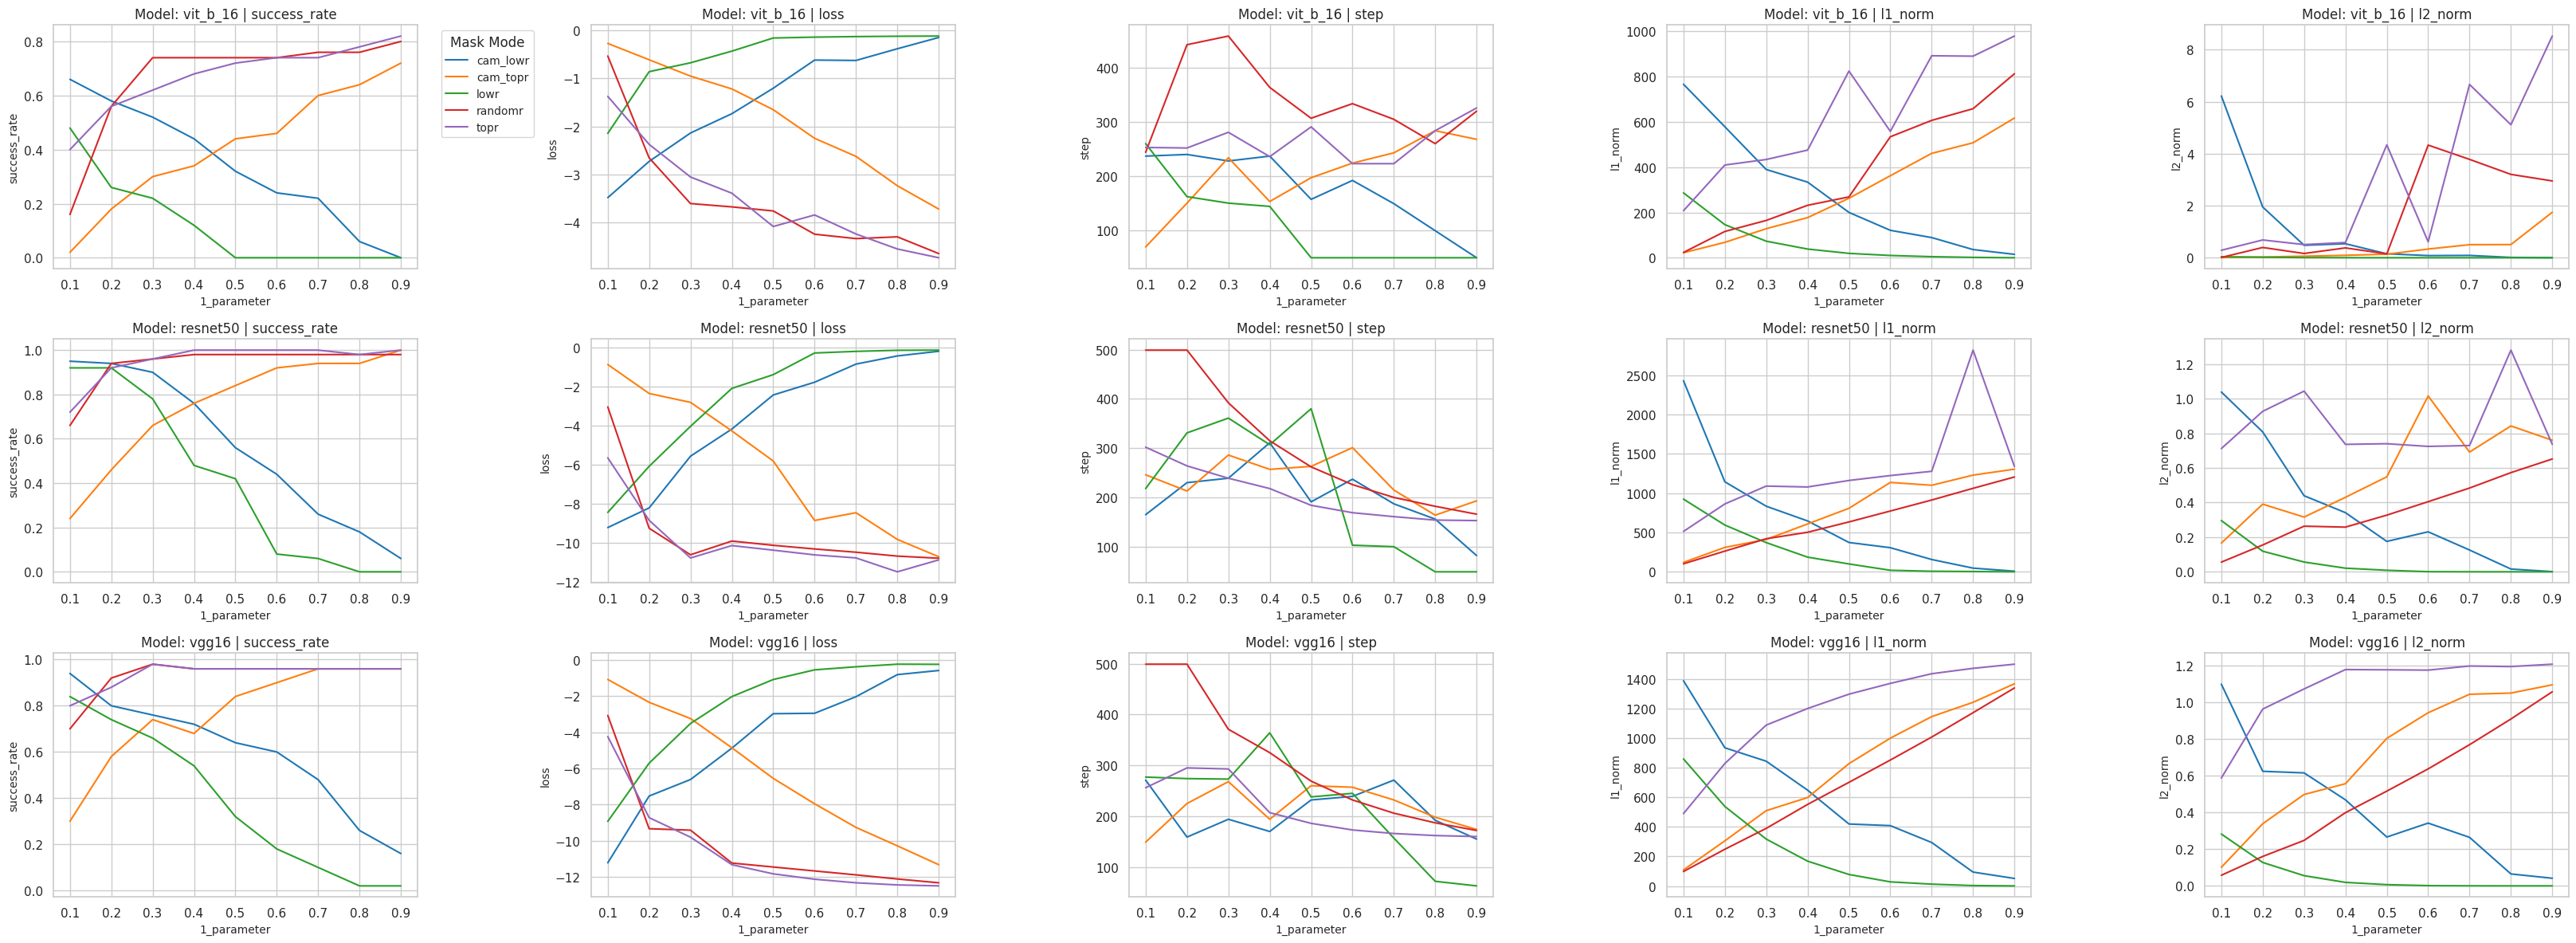

In [55]:
label_list = ['success_rate', 'loss', 'step', 'l1_norm', 'l2_norm']
plot_success_rate_vs_r(data_result, '1_parameter', label_list, output_path=data_root, save_name='success_rate_vs_1_parameter')

## 完整数据，查看攻击每一步的过程中指标的变化

In [56]:
data_all = pd.read_excel('data_stage2/multi_step_total100_0918/result_multi_step_total100_0918.xlsx')
data_all.head()

<bound method NDFrame.head of           model    algo   alpha mask_mode  step  parameter   eta    l1_norm  \
0      vit_b_16  i_fgsm  0.0001       all     0       -1.0  0.01   144.8242   
1      vit_b_16  i_fgsm  0.0001       all     1       -1.0  0.01   150.3013   
2      vit_b_16  i_fgsm  0.0001       all     2       -1.0  0.01   162.3484   
3      vit_b_16  i_fgsm  0.0001       all     3       -1.0  0.01   167.7202   
4      vit_b_16  i_fgsm  0.0001       all     4       -1.0  0.01   176.6721   
...         ...     ...     ...       ...   ...        ...   ...        ...   
32428     vgg16  i_fgsm  0.0001      topr   292        0.3  0.01  1086.6422   
32429     vgg16  i_fgsm  0.0001      topr   293        0.2  0.01   829.0582   
32430     vgg16  i_fgsm  0.0001      topr   293        0.3  0.01  1090.1844   
32431     vgg16  i_fgsm  0.0001      topr   294        0.2  0.01   829.0152   
32432     vgg16  i_fgsm  0.0001      topr   295        0.2  0.01   829.9144   

        l2_norm      

In [57]:
data_all.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter
0,vit_b_16,i_fgsm,0.0001,all,0,-1.0,0.01,144.8242,0.031619,-0.118667,0.0,161.234519,100,-1.0
1,vit_b_16,i_fgsm,0.0001,all,1,-1.0,0.01,150.3013,0.026202,-0.125851,0.0,161.234519,100,-1.0
2,vit_b_16,i_fgsm,0.0001,all,2,-1.0,0.01,162.3484,0.043079,-0.133787,0.0,161.234519,100,-1.0
3,vit_b_16,i_fgsm,0.0001,all,3,-1.0,0.01,167.7202,0.028644,-0.141739,0.0,161.234519,100,-1.0
4,vit_b_16,i_fgsm,0.0001,all,4,-1.0,0.01,176.6721,0.031435,-0.150002,0.0,161.234519,100,-1.0


In [58]:
data_r = data_all[(data_all['mask_mode'].isin(['topr', 'cam_topr', 'randomr', 'cam_lowr', 'lowr'])) & (data_all['1_parameter'] == 0.2)]
data_r.head()

,model,algo,alpha,mask_mode,step,parameter,eta,l1_norm,l2_norm,loss,success_rate,run_time,batch_pictures,1_parameter
228,vit_b_16,i_fgsm,0.0001,cam_lowr,0,0.8,0.01,105.8930,0.024408,-0.118667,0.0,948.540104,100,0.2
237,vit_b_16,i_fgsm,0.0001,cam_lowr,1,0.8,0.01,107.0836,0.017084,-0.123816,0.0,948.540104,100,0.2
246,vit_b_16,i_fgsm,0.0001,cam_lowr,2,0.8,0.01,116.9740,0.056309,-0.129287,0.0,948.540104,100,0.2
255,vit_b_16,i_fgsm,0.0001,cam_lowr,3,0.8,0.01,116.8764,0.019530,-0.134955,0.0,948.540104,100,0.2
264,vit_b_16,i_fgsm,0.0001,cam_lowr,4,0.8,0.01,120.9703,0.020181,-0.140641,0.0,948.540104,100,0.2


In [85]:
def plot_success_rate_vs_step(data, parameter, var, label_list, **kwargs):
    '''
    绘制不同模型下，各个标签（label）与参数（parameter）的关系图。
    每个子图表示一个模型和一个标签的关系，图例表示不同的 mask_mode。

    Args:
        data (pd.DataFrame): 数据集
        parameter (float): 参数值, 固定值
        var: x轴参数, 例如 'step'
        label_list (list): 需要绘制的标签列表，例如 ['success_rate', 'l1_norm', 'l2_norm', 'loss', 'step']
    '''
    output_path = kwargs.get('output_path', None)
    save_name = kwargs.get('save_name', None)
    reverse = kwargs.get('reverse', False)
    model_list = kwargs.get('model_list', ['vit_b_16', 'resnet50', 'vgg16'])
    
    if reverse:
        df_filtered = data[(data['mask_mode'].isin(['topr', 'randomr', 'lowr'])) & (round(data['1_parameter'],2) == parameter)]
    else:
        df_filtered = data[(data['mask_mode'].isin(['topr', 'randomr', 'lowr'])) & (data['parameter'] == parameter)]
    df_filtered = df_filtered.reset_index(drop=True)
    
    mask_mode_list = df_filtered['mask_mode'].unique()
    
    ncols = len(label_list)
    nrows = len(model_list)

    sns.set(style="whitegrid")
    palette = sns.color_palette("tab10", n_colors=len(mask_mode_list))
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6.5, nrows*4), squeeze=False)
    axes = axes.flatten()

    for i, model in enumerate(model_list):
        df_model = df_filtered[df_filtered['model'] == model]
        for j, label in enumerate(label_list):
            ax = axes[i * len(label_list) + j]
            
            # 筛选需要绘制的数据
            df_plot = df_model[[var, 'mask_mode', label]].dropna()
            sns.lineplot(
                data=df_plot, 
                x=var, 
                y=label, 
                hue='mask_mode', 
                ax=ax, 
                # marker='o', 
                palette=palette
            )
            
            # 设置子图标题和轴标签
            ax.set_title(f"Model: {model} | {label}", fontsize=12)
            ax.set_xlabel(f'{var}', fontsize=10)
            ax.set_ylabel(label, fontsize=10)
            ax.tick_params(axis='x')
            
            # 只在第一个子图显示图例
            if i == 0 and j == 0:
                ax.legend(title='Mask Mode', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
            else:
                legend = ax.get_legend()
                if legend is not None:
                    legend.remove()
            
    # 隐藏多余的子图
    total_subplots = nrows * ncols
    used_subplots = len(model_list) * len(label_list)
    for idx in range(used_subplots, total_subplots):
        axes[idx].axis('off')
    
    # 调整子图布局
    plt.tight_layout()
    if output_path and save_name:
        plt.savefig(f'{output_path}/{save_name}.png', dpi=300)
    else:
        plt.show()

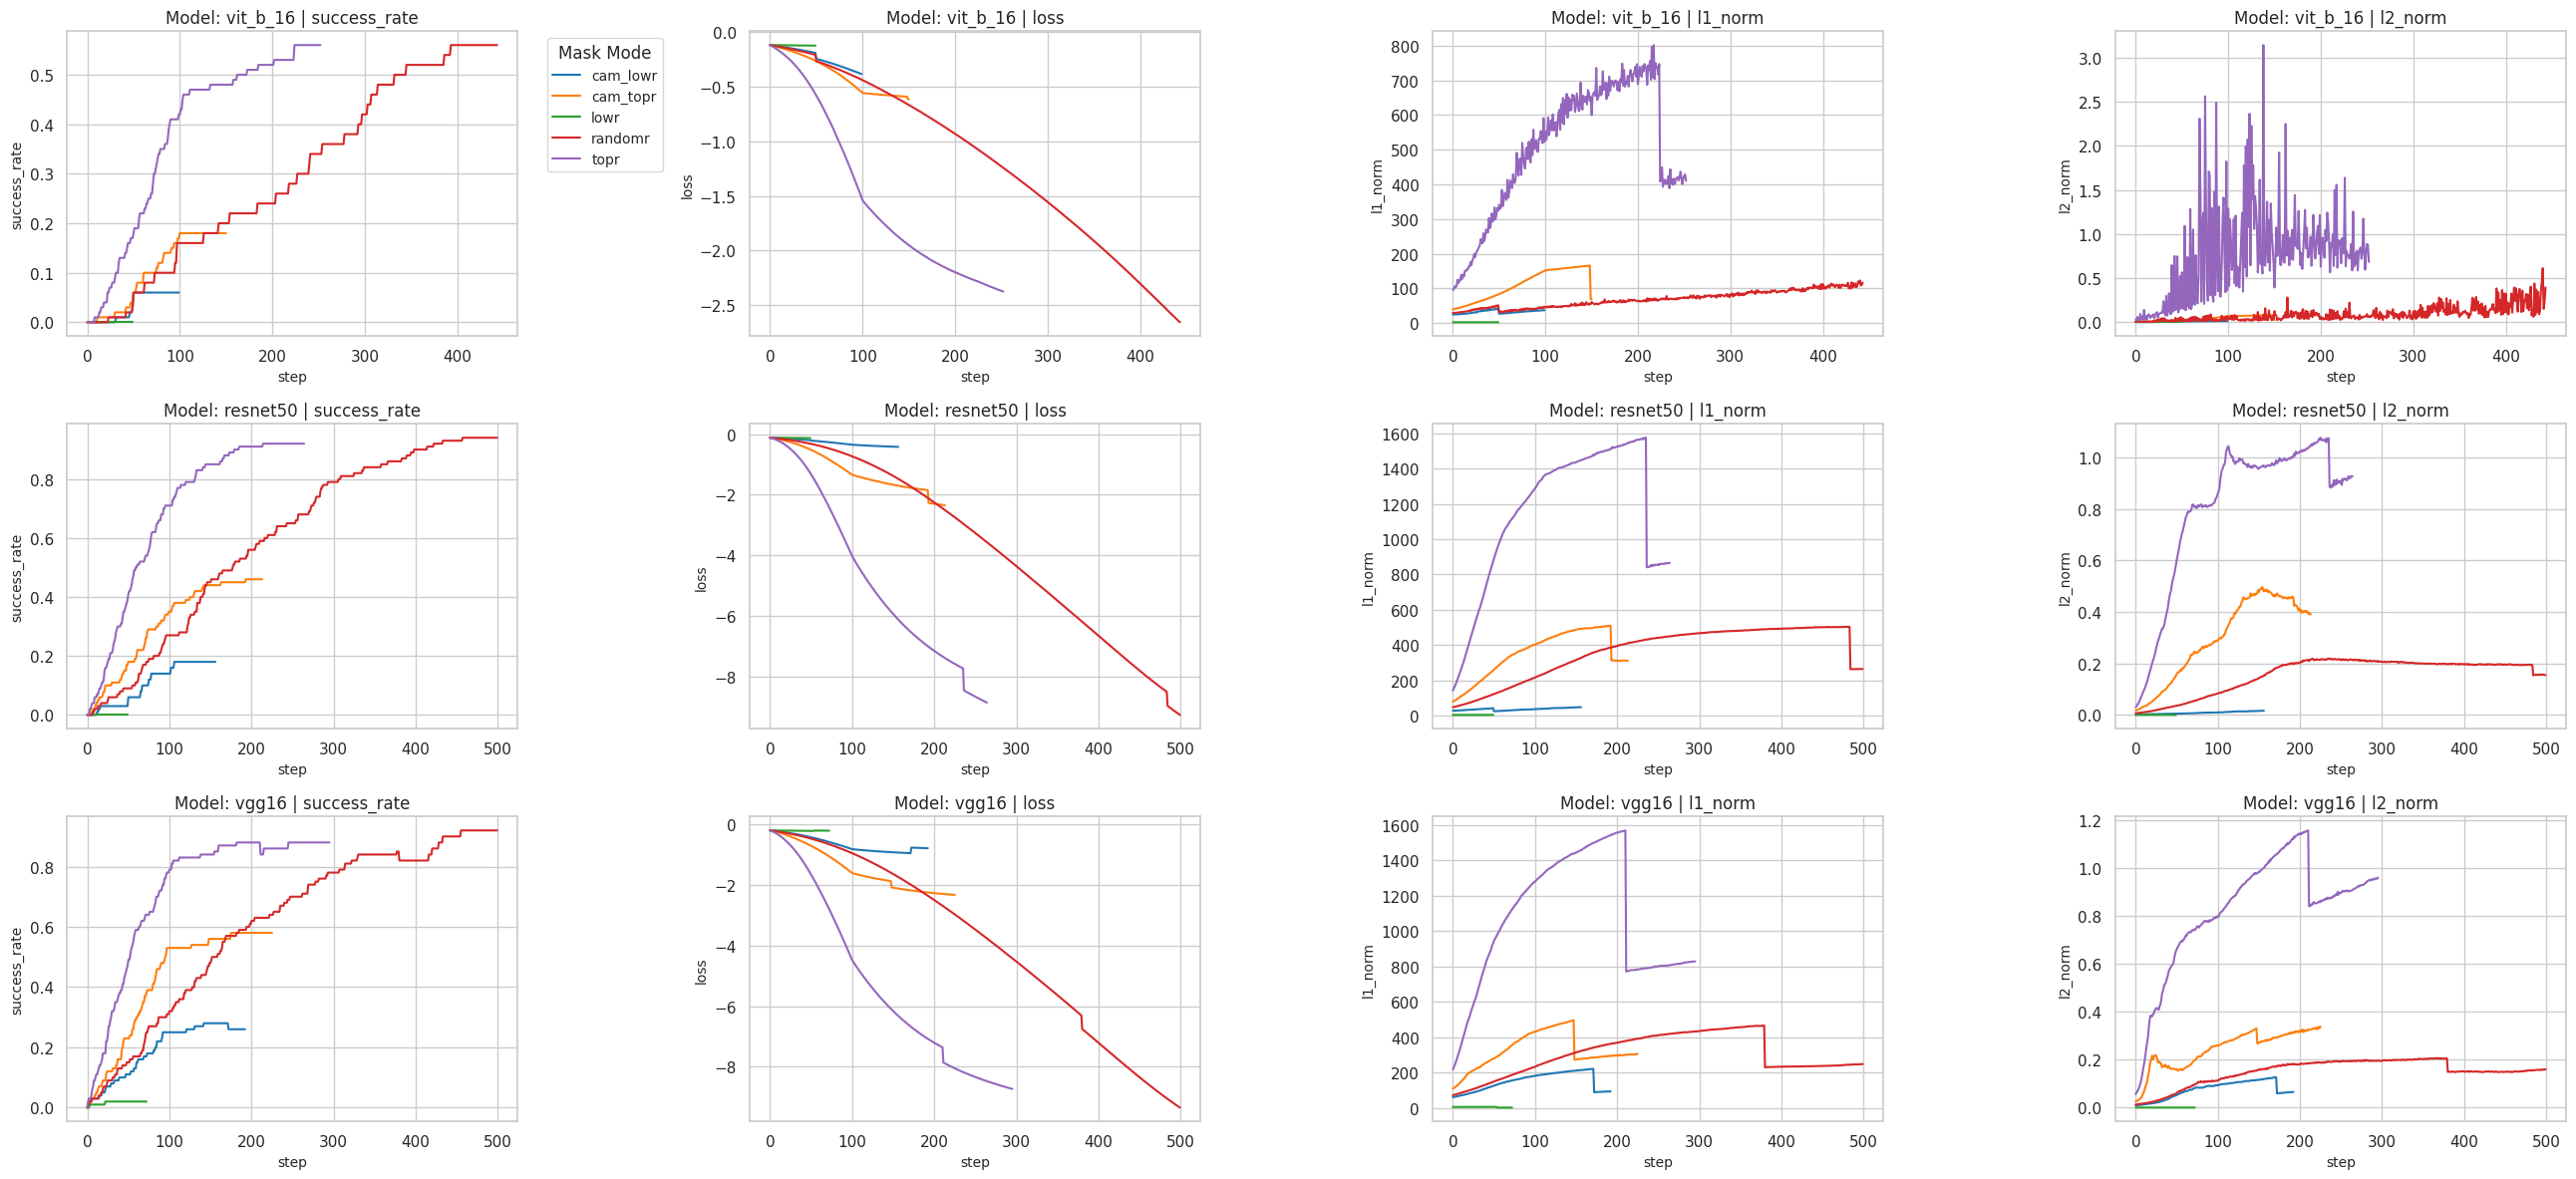

In [71]:
label_list = ['success_rate', 'loss', 'l1_norm', 'l2_norm']
plot_success_rate_vs_step(data_all, 0.2, 'step', label_list, output_path=data_root, save_name='success_rate_vs_step', reverse=False, model_list=['vit_b_16', 'resnet50', 'vgg16'])

In [ ]:
data_all1 = pd.read_excel('data_stage2/vis_multi_step_0922_64/vis_result_multi_step_0920.xlsx')

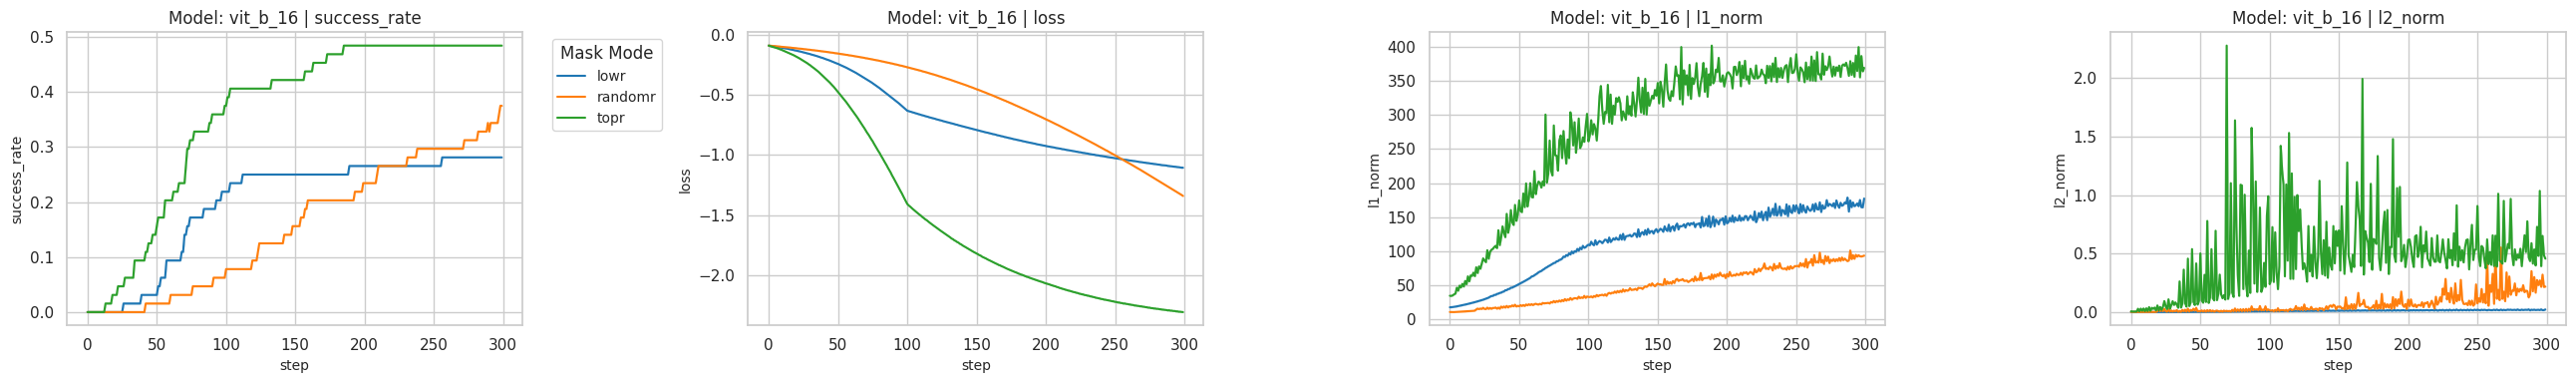

In [87]:
plot_success_rate_vs_step(data_all1, 0.2, 'step', label_list, output_path=data_root, save_name='success_rate_vs_step_64', reverse=True, model_list=['vit_b_16'])